# K-Nearest Neighbors (KNN): A Complete Guide

In this notebook, we will implement the K-Nearest Neighbors (KNN) algorithm and explain each step in detail.

---

## Introduction

**K-Nearest Neighbors (KNN)** is a supervised machine learning algorithm used for both classification and regression. The principle behind KNN is simple: to make predictions about a data point, the algorithm looks at the `k` nearest data points (neighbors) in the training set and assigns the most common class label (for classification) or the average value (for regression).

### Key Concepts:
- **K**: The number of neighbors considered when making predictions.
- **Distance Metric**: The algorithm calculates the distance between data points, often using Euclidean distance.
- **Voting**: For classification, the predicted class is based on a majority vote of the neighbors' classes.

---

## 1. Importing Required Libraries

We’ll start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

## 2. Creating a Synthetic Dataset 

* We'll generate a simple dataset for binary classification.

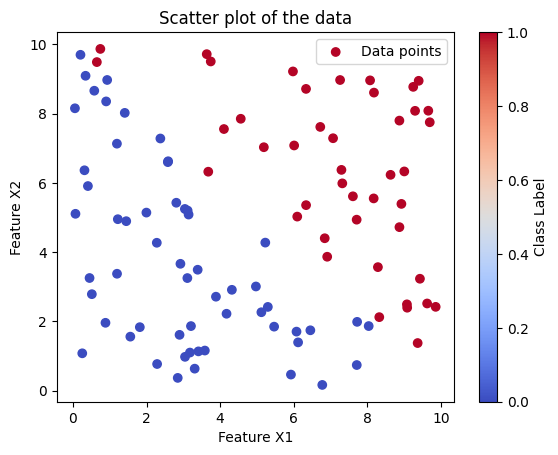

In [2]:
# Generate synthetic data for binary classification
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 points, 2 features between 0 and 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Class 1 if sum of features > 10, otherwise class 0

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", label="Data points")
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("Scatter plot of the data")
plt.colorbar(label='Class Label')
plt.legend()
plt.show()

## 3. Splitting the Data into Training and Testing Sets

* Next, we split the data into training and testing sets.

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Training the K-Nearest Neighbors Classifier 

* Now we will create and train a K-Nearest Neighbors Classifier. Here, we’ll use k=5.

In [4]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 5. Making Predictions 

* Next, we will use the trained model to make predictions on the test set.

In [5]:
# Predict on the test set
y_pred = knn.predict(X_test)

## 6. Evaluating the Model 

## 6.1 Accuracy Score 

* We start by calculating the accuracy of the model.

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


### 6.2 Confusion Matrix and Classification Report

* To get a detailed performance breakdown, we will generate the confusion matrix and classification report.

<Figure size 800x600 with 0 Axes>

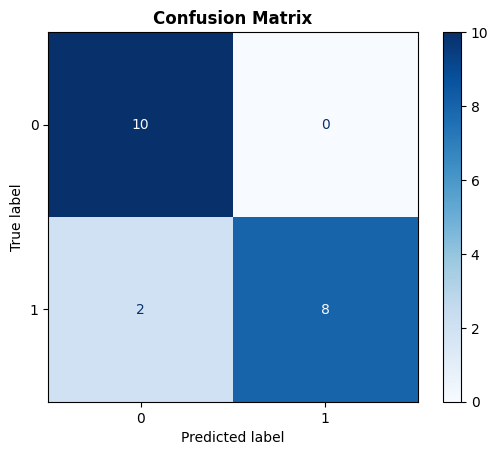

Classification Report:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [10]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print()
print(class_report)

### 6.3 ROC Curve and AUC 

* We'll also compute and plot the ROC curve, and calculate the AUC score.

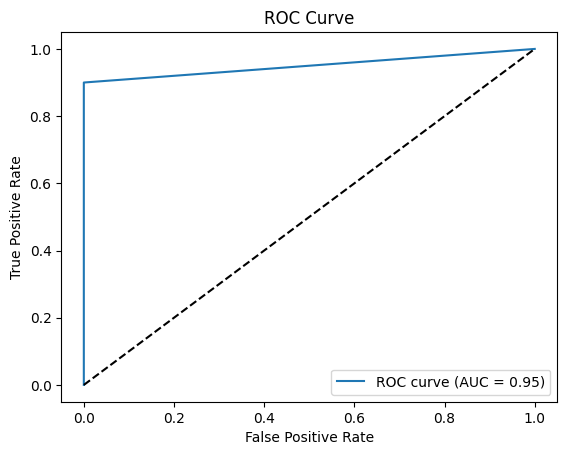

In [8]:
# Predict probabilities for ROC curve
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 7. Visualizing Decision Boundaries 

* One of the key visual tools with KNN is the decision boundary it creates. Let’s visualize how KNN separates the two classes in our dataset.

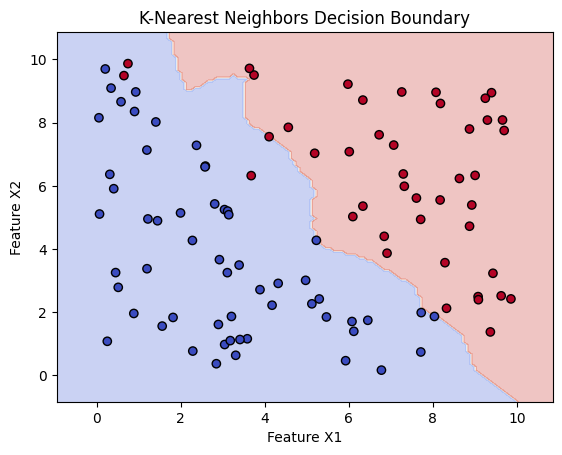

In [9]:
# Create a grid of values for X1 and X2 to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class labels for the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap="coolwarm")
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("K-Nearest Neighbors Decision Boundary")
plt.show()

## 8. Conclusion 

In this notebook, we implemented the K-Nearest Neighbors (KNN) algorithm and explored various steps:

	•	Data generation and visualization.
	•	Model training and prediction.
	•	Model evaluation using accuracy, confusion matrix, and ROC curve.
	•	Visualizing the decision boundaries created by KNN.

**KNN is a simple yet powerful algorithm, particularly useful for smaller datasets where interpretability and simplicity are key considerations.**